# 深層学習ノートブック-11 PytorchのNNモジュール
深層学習の仕組みの勉強のためにMLPをスクラッチで実装してきたが、  
これはPytorchのtorch.nnモジュールに実装されている。  
ただ、MLPのクラスがまるごとあるわけではなく、線形変換の層、活性化関数(ReLU)、損失関数など、  
MLPを構成するコンポーネントごとに実装されている。  
ユーザとしてはこれらのコンポーネントを自由に組み合わせて学習モデルを構築していくことになる。  

* torch.nnに様々な深層学習のアーキテクチャを構築するためのクラスと関数が入っている
* 層：NNの基本的な層のblock
    * nn.Linear: 全結合層またはFC(Fully Connected)層ともいう。$XW^T+b$が実装されている。
    * nn.ReLU: ReLU層
* 損失関数：ネットワークのパフォーマンスを評価する
    * nn.MSELoss: 平均二乗誤差
    * nn.CrossEntropy: 交差エントロピー
* モジュール：全てのNNモジュールの基本クラス。カスタムでクラスを作成する時はnn.Moduleを継承する
* 関数：単一の関数として層や損失関数, 活性化関数を提供する。torch.nn.funcbonalに入っていて，通常はFとしてimportする

## ■ nn.Linear
線形変換を行う部分の層を表すクラス。

In [1]:
import torch
# NNモジュールを読み込む
from torch import nn
from torch.nn import functional as F

In [2]:
# 入力の次元と出力の次元（隠れ層１層目ならば入力は特徴量数、出力は１層目のノード数）を指定してインスタンス生成
linear = nn.Linear(64, 30)

In [3]:
# 生成したLayerのパラメタを確認
list(linear.parameters())

[Parameter containing:
 tensor([[-1.1046e-02,  5.5857e-03,  2.5025e-02,  ...,  8.1937e-03,
          -5.6370e-02, -1.0976e-01],
         [-7.9472e-02,  6.6317e-02,  1.1154e-01,  ...,  2.5045e-02,
           7.5435e-02,  5.9789e-02],
         [-8.0149e-02, -1.1696e-01, -1.0465e-01,  ...,  1.1494e-01,
           9.0277e-02, -1.0800e-01],
         ...,
         [-1.2304e-01,  5.6580e-05, -3.3194e-03,  ..., -2.8344e-02,
           5.6041e-02, -6.5417e-02],
         [ 4.2861e-03, -5.8977e-02,  1.1517e-01,  ...,  8.6463e-02,
          -8.2400e-02,  8.5337e-02],
         [ 4.0806e-02,  7.5585e-02, -1.6125e-02,  ..., -9.0116e-02,
          -1.9493e-02, -9.3259e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0726,  0.0846, -0.0918, -0.0318, -0.0923, -0.0496,  0.0174,  0.0853,
         -0.0805,  0.0751, -0.0512, -0.0234,  0.1060,  0.0289,  0.0721,  0.0784,
         -0.0364, -0.1085,  0.0797,  0.0177,  0.0273, -0.0026, -0.0316, -0.0169,
          0.0304,  0.1206, -0.0483, -0.0564, 

In [4]:
# 重みを確認
print(linear.weight)
print(linear.weight.shape)

Parameter containing:
tensor([[-1.1046e-02,  5.5857e-03,  2.5025e-02,  ...,  8.1937e-03,
         -5.6370e-02, -1.0976e-01],
        [-7.9472e-02,  6.6317e-02,  1.1154e-01,  ...,  2.5045e-02,
          7.5435e-02,  5.9789e-02],
        [-8.0149e-02, -1.1696e-01, -1.0465e-01,  ...,  1.1494e-01,
          9.0277e-02, -1.0800e-01],
        ...,
        [-1.2304e-01,  5.6580e-05, -3.3194e-03,  ..., -2.8344e-02,
          5.6041e-02, -6.5417e-02],
        [ 4.2861e-03, -5.8977e-02,  1.1517e-01,  ...,  8.6463e-02,
         -8.2400e-02,  8.5337e-02],
        [ 4.0806e-02,  7.5585e-02, -1.6125e-02,  ..., -9.0116e-02,
         -1.9493e-02, -9.3259e-02]], requires_grad=True)
torch.Size([30, 64])


確かにWのshapeが出力x入力になっている。

In [6]:
print(linear.bias)
print(linear.bias.shape)

Parameter containing:
tensor([ 0.0726,  0.0846, -0.0918, -0.0318, -0.0923, -0.0496,  0.0174,  0.0853,
        -0.0805,  0.0751, -0.0512, -0.0234,  0.1060,  0.0289,  0.0721,  0.0784,
        -0.0364, -0.1085,  0.0797,  0.0177,  0.0273, -0.0026, -0.0316, -0.0169,
         0.0304,  0.1206, -0.0483, -0.0564,  0.0212,  0.0984],
       requires_grad=True)
torch.Size([30])


In [13]:
X = torch.randn((5, 64)) # 64の特徴量を持つ5データを定義
# インスタンスにtensorを入れてcallすることで、forwardが計算される。
Z = linear(X)

In [14]:
print(Z)
print(Z.shape)

tensor([[-0.1680,  0.5441, -1.7527, -0.2023,  0.3643, -0.2527,  0.3505,  0.4083,
         -0.4886, -0.9790, -0.1874,  0.0556,  0.8950, -1.1019, -0.1446,  0.0945,
         -0.5899,  0.1869,  0.1683, -0.8990, -0.5504,  0.4096,  0.5353,  0.2216,
         -0.9816,  0.2632, -0.4898,  0.2971,  1.1802, -0.1012],
        [-0.5620,  0.9237,  0.3814, -1.2170, -0.2731, -0.1448,  0.1121, -0.4421,
         -0.4533, -0.2588, -0.2827, -0.6483,  0.5038, -0.1167,  0.2720,  0.4148,
         -0.5469,  0.0335,  0.0597, -0.1675, -0.1984, -0.8196, -0.4251,  0.2787,
          0.6631,  0.1476, -0.6547, -0.2453, -0.3012,  0.0060],
        [ 0.9574,  0.3612, -0.3115, -0.7415,  0.1366, -0.0830,  0.5199, -0.5133,
          0.1683,  0.6514, -0.1524,  0.4644,  0.2014,  0.4153,  0.2770, -0.3030,
          0.3074,  0.5833, -0.0500,  0.4514,  0.1932, -0.0686, -0.0691,  0.3298,
          0.4217,  0.5895, -0.0710,  0.4347, -0.5996,  0.0111],
        [ 0.2486,  0.8582, -1.4101,  0.6200,  0.2725, -0.0588,  0.3219, -0.1364

## ■ nnモジュールでMLPモデルを作る
作成の仕方は大きく３つあり、ここでは1.について実装する。  
1. nn.<class>とF.<function>を組み合わせる  
    * nn.Moduleクラスを継承してMLPクラスを作成
    * パラメタを持つ層はnn.<class>で定義する。
    * パラメタを持たない操作（活性化関数など）はF.<functional>で定義する  
    →パラメタを持つ層の管理が楽というメリットがある。
2. nn.<class>のみで構成する。
3. nn.Sequentialを使う  


## 作成方法1.  nn.<class>とF.<function>を組み合わせる  
* nn.Moduleクラスを継承してMLPクラスを作成
* パラメタを持つ層はnn.<class>で定義する。
* パラメタを持たない操作（活性化関数など）はF.<functional>で定義する  
→パラメタを持つ層の管理が楽というメリットがある。

In [3]:
class MLP_1(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        # 親クラスのinitを呼び出す。
        super().__init__()
        # 全結合層はパラメタを持つのでnn.で定義する
        # num_in, num_hidden, num_outを渡すことにより全結合層を実体化させる
        self.linear_1 = nn.Linear(num_in, num_hidden)
        self.linear_2 = nn.Linear(num_hidden, num_out)

    # nn.Moduleにもforwardメソッドがあり、ここでオーバーライドしている。
    def forward(self, x):
        # デバッグ用
        # z1 = self.linear_1(z)
        # a1 = F.relu(z1)
        # z2 = self.linear_2(a1)
        # 隠れ層の線形変換 →ReLu適用→ 隠れ層の線形変換を一気にやっている。
        z = self.linear_2( F.relu( self.linear_1(x)) )
        return z

In [4]:
model = MLP_1(64, 30, 10)

In [5]:
test_tensor = torch.randn((1, 64))
# forwardの計算
model(test_tensor)

tensor([[-0.0322, -0.1147,  0.2469, -0.1051, -0.0996,  0.0722, -0.0356,  0.1111,
          0.1322,  0.0662]], grad_fn=<AddmmBackward0>)

### ※補足  
model()のような形で呼び出されるものは__call__()に実装するのがpythonの慣例。  
上記のMLPクラスでは特に__call__を修正していないのに、  
forwardが計算されたのは、親クラスのnn.Moduleにも__call__()があり、この中でforwardを呼び出す実装になっているため。  
つまり、__call__は継承元のまま使い、forwardはオーバーライドしているということ。


## 作成方法2.  nn.<class>のみでモデルを構成する
* パラメータを持たない操作もnn.<class>を使用する
* モデル全体の構造に一貫性が生まれ，パラメータの有無を意識する必要がなくなる
* 操作によっては，nn.<class>の方がF.<funcbon>よりも処理が重い場合もある

In [6]:
class MLP_2(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.linear_1 = nn.Linear(num_in, num_hidden)
        self.linear_2 = nn.Linear(num_hidden, num_out)
        # ReLUは特に引数は必要ない
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.linear_2( self.relu( self.linear_1(x)) )

この例では作成方法１とほぼ変わらない。

In [7]:
model = MLP_1(64, 30, 10)
X = torch.randn(5, 64)
Z = model(X)
Z.shape

torch.Size([5, 10])

## 作成方法3.  nn.Sequentialを使う
* nn.Sequential()にnn.<class>のインスタンスを直列に引数に渡す
* nn.Sequential()は，NNのアーキテクチャを直列に定義するための簡単な方法
* 非常にシンプルなアーキテクチャを作成する際に便利。よく使う。
* これ単体では複雑なモデルは作れないが、nn.Sequential()で作成したシンプルなモデルをいくつか組み合わせて  
  複雑なモデルを表現することが可能。

In [17]:
num_in = 64
num_hidden = 30
num_out = 10

# 下記のようにMLPのコンポーネントを順に書くだけ。
model = nn.Sequential(
    nn.Linear(num_in, num_hidden),
    nn.ReLU(),
    nn.Linear(num_hidden, num_out)
)

In [18]:
Z = model(X)
Z.shape

torch.Size([5, 10])

In [19]:
Z

tensor([[-0.3806, -0.0226, -0.2436, -0.0981, -0.0469, -0.4377, -0.0730, -0.0997,
         -0.3881, -0.1324],
        [-0.0778, -0.0197, -0.1164,  0.2043,  0.0170, -0.2359,  0.0838, -0.2144,
         -0.1703,  0.1445],
        [ 0.0878,  0.3312, -0.3318, -0.0419,  0.0191, -0.0939,  0.1373, -0.2027,
         -0.2579,  0.3942],
        [ 0.0815,  0.3040,  0.1592,  0.0576,  0.1506, -0.3425,  0.2689, -0.3373,
         -0.1882,  0.0303],
        [ 0.0986, -0.0412, -0.0029,  0.1724, -0.1277, -0.0636,  0.2368, -0.1094,
         -0.0423,  0.2787]], grad_fn=<AddmmBackward0>)

------------------------------------

## ■ nnモジュールで作成したMLPモデルを学習させる
上記で作成したnnモジュールによるMLPの実装を用いて実際に学習させてみる。  
以降はGPUを使用するため、Google Colabで実行すること。

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [156]:
# MNISTデータセットの読み込み
dataset = datasets.load_digits()
X = torch.tensor( dataset.data , dtype=torch.float32) 
y = torch.tensor( dataset.target)
y = F.one_hot(y, num_classes=10)

# hold-out
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 標準化
train_mean, train_std = X_train.mean(), X_train.std()
X_train = (X_train - train_mean) / train_std
X_val = (X_val - train_mean) / train_std

# モデルのコンストラクタに渡す引数を定義
num_in = 64
num_hidden = 30
num_out = 10

# モデル定義（２層のMLP）
MLP_model = MLP_1(num_in=num_in, num_hidden=num_hidden, num_out=num_out)
# requires_grad_をTrueに設定。最後に_がつくのは設定するという意味。
MLP_model.requires_grad_(True)

MLP_1(
  (linear_1): Linear(in_features=64, out_features=30, bias=True)
  (linear_2): Linear(in_features=30, out_features=10, bias=True)
)

In [158]:
# バッチサイズとバッチの個数を定義
batch_size = 32
num_batches = X_train.shape[0] // batch_size + 1
learning_rate = 0.03

# 学習・検証結果格納用辞書
train_results = {}

for i, _ in enumerate(range(100)):
    #　インデックスをシャッフル
    shuffled_indices = np.random.permutation(len(y_train))

    # shuffled_indicesからの取り出し範囲初期化
    idx_start = 0
    idx_end = batch_size

    # 各バッチでの学習データに対するlossを累積する用の変数
    cum_loss = 0

    for _ in range(num_batches):
        # 学習データ定義
        indices_train = shuffled_indices[ idx_start:idx_end ]
        X_train_batch = X_train[indices_train]
        y_train_batch = y_train[indices_train]

        # 予測
        y_pred = F.softmax(MLP_model(X_train_batch), dim=1)

        # 損失計算
        loss = F.cross_entropy(y_pred , y_train_batch.to(torch.float32))
        cum_loss += loss.item()
        # 逆伝播の計算
        loss.backward()

        # パラメタ更新
        with torch.no_grad():
            MLP_model.linear_1.weight -= learning_rate * MLP_model.linear_1.weight.grad
            MLP_model.linear_1.bias -= learning_rate * MLP_model.linear_1.bias.grad
            MLP_model.linear_2.weight -= learning_rate * MLP_model.linear_2.weight.grad
            MLP_model.linear_2.bias -= learning_rate * MLP_model.linear_2.bias.grad

        # 勾配初期化
        MLP_model.linear_1.weight.grad = None
        MLP_model.linear_1.bias.grad = None
        MLP_model.linear_2.weight.grad = None
        MLP_model.linear_2.bias.grad = None

        # 取り出し範囲更新
        idx_start += batch_size
        idx_end += batch_size
    
    # 検証データに対する損失を計算
    y_pred_val = F.softmax(MLP_model(X_val), dim=1)
    loss_val = F.cross_entropy(y_pred_val, y_val.to(torch.float32))

    # 損失、accuracyを記録
    train_results[f"epoch_{i}"] = {
        "Loss_train": cum_loss / num_batches,
        "Loss_val": loss_val.item(),
        "Accuracy": ( (torch.argmax(y_pred_val, dim=1) == torch.argmax(y_val, dim=1)).sum() / len(y_val) ).item()
    }

    print(f'epoch_{i}: {train_results[f"epoch_{i}"]}')


epoch_0: {'Loss_train': 2.2983543157577513, 'Loss_val': 2.2969343662261963, 'Accuracy': 0.18333333730697632}
epoch_1: {'Loss_train': 2.294007736444473, 'Loss_val': 2.292354106903076, 'Accuracy': 0.22962963581085205}
epoch_2: {'Loss_train': 2.2884945452213286, 'Loss_val': 2.2866241931915283, 'Accuracy': 0.25555557012557983}
epoch_3: {'Loss_train': 2.2819821178913116, 'Loss_val': 2.2793376445770264, 'Accuracy': 0.2777777910232544}
epoch_4: {'Loss_train': 2.272976589202881, 'Loss_val': 2.269819974899292, 'Accuracy': 0.29629629850387573}
epoch_5: {'Loss_train': 2.261730444431305, 'Loss_val': 2.257117509841919, 'Accuracy': 0.31111112236976624}
epoch_6: {'Loss_train': 2.2460343062877657, 'Loss_val': 2.2395927906036377, 'Accuracy': 0.32407405972480774}
epoch_7: {'Loss_train': 2.225168067216873, 'Loss_val': 2.2152552604675293, 'Accuracy': 0.34259259700775146}
epoch_8: {'Loss_train': 2.197861856222153, 'Loss_val': 2.1843299865722656, 'Accuracy': 0.3499999940395355}
epoch_9: {'Loss_train': 2.163

# ●学習曲線の描画
学習データと検証データでの損失の推移を確認してみる。

In [164]:
loss_per_epoch_train = []
loss_per_epoch_val = []

for result in train_results.values():
    loss_per_epoch_train.append(result['Loss_train'])
    loss_per_epoch_val.append(result['Loss_val'])

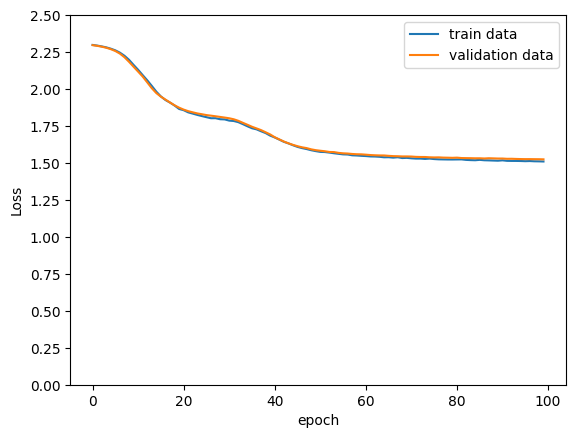

In [165]:
plt.plot(loss_per_epoch_train, label='train data')
plt.plot(loss_per_epoch_val, label='validation data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.yticks(np.linspace(0.0, 2.5, 11))
plt.legend()